# Fernando Passacantilli Silva Ferrari

## CAP-394: Introdução à Ciência de Dados

# Sumário

- [Introdução](#Introdução)

- [Dados](#Dados)

- [Desenvolvimento](#Desenvolvimento)
    - [Preprocessamento](#Preprocessamento)
    - [Análise](#Análise)
    
- [Resposta](#Resposta)

- [Referências](#Referências)

# Introdução

**Quais tipos de pessoas tiveram maior probabilidade de sobreviver ao naufrágio do Titanic?**

Durante sua viagem inaugural, em 15 de abril de 1912, o navio de passageiros RMS Titanic, anteriormente tido como "inafundável", afundou ao colidir-se com um iceberg, após a ocorrência de uma série de eventos propícios para tal, tais como: Velocidade e percurso impróprios; Condições climáticas gerando icebergs, assim como as marés direcionavam, tipicamente, os icebergs ao navio; E avisos de iceberg não propagados propriamente [1].

Este documento visa responder a pergunta: "Quais tipos de pessoas tiveram maior probabilidade de sobreviver ao naufrágio do Titanic?", para tal, será construído um modelo preditivo para analisar os dados de forma a responder a pergunta [2].

In [1]:
# Módulos Python necessários.

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm

import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import io

from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

/home/swagmence/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df = pd.read_csv('./titanic/train.csv')

# Dados

Seguem abaixo informações sobre os dados e Dez colunas contendo informações sobre passageiros.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Desenvolvimento

Para preprocessar os dados, os mesmos deverão se apresentar de forma numérica, para tal, deve-se descartar valores nulos; colunas pouco relevantes para análises numéricas como, o Nome dos passageiros também serão descartadas.

In [5]:
cols = ['Name', 'Ticket', 'Cabin']

df = df.drop(cols, axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


As colunas de classe do passageiro, sexo e o Local de embarcação serão transformadas em valores dummy para que possam ser representadas de maneira numérica.

In [7]:
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))
    
titanic_dummies = pd.concat(dummies, axis=1)
df = pd.concat((df,titanic_dummies), axis=1)
df = df.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

Deve-se interpolar os valores de idade dos passageiros, considerando que muitas linhas possuem tais valores nulos.

In [8]:
df['Age'] = df['Age'].interpolate()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
1              891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
female         891 non-null uint8
male           891 non-null uint8
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(4), uint8(8)
memory usage: 48.9 KB


### Preprocessamento

O preprocessamento deve ser realizado com os dados em formato numérico. Ao converter todos os dados, conforme demosntrado acima, estes serão tratados conforme abaixo, onde X, corresponde ao conjunto de entradas com 14 valores, e Y, corresponde a uma saída menor, que verifica se os passageiros sobreviveram ou não.

In [10]:
X = df.values
Y = df['Survived'].values

O conjunto X, neste estado, ainda possui os dados para sobrevivência, que deverão sair no conjunto Y, por isso remove-se esta coluna.

In [11]:
X = np.delete(X, 1, axis=1)

E então, divide-se o conjunto de dados em 70% para treinamento e 30% para testes.

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Análise

O documento visa prever quais são os tipos de passageiros com maior índice de sobrevivência, para tal, é necessário um modelo de aprendizagem de máquina, mais conhecida como: Machine Learning; além dos dados treinados previamente.

O modelo selecionado para a tarefa em questão, trata-se do modelo de Árvore de Decisão, que é um método de estruturar dados em nós de continuidade, com base em decisões julgadas como razoáveis, de maneira similar à criação de um fluxograma [3].

Os dados preprocessados serão utilizados para a previsão, isto é, para encontrar a solução ao problema proposto com o modelo de Árvore de Decisão. 

In [13]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

Segue abaixo a Árvore de Decisão formada pelo modelo.

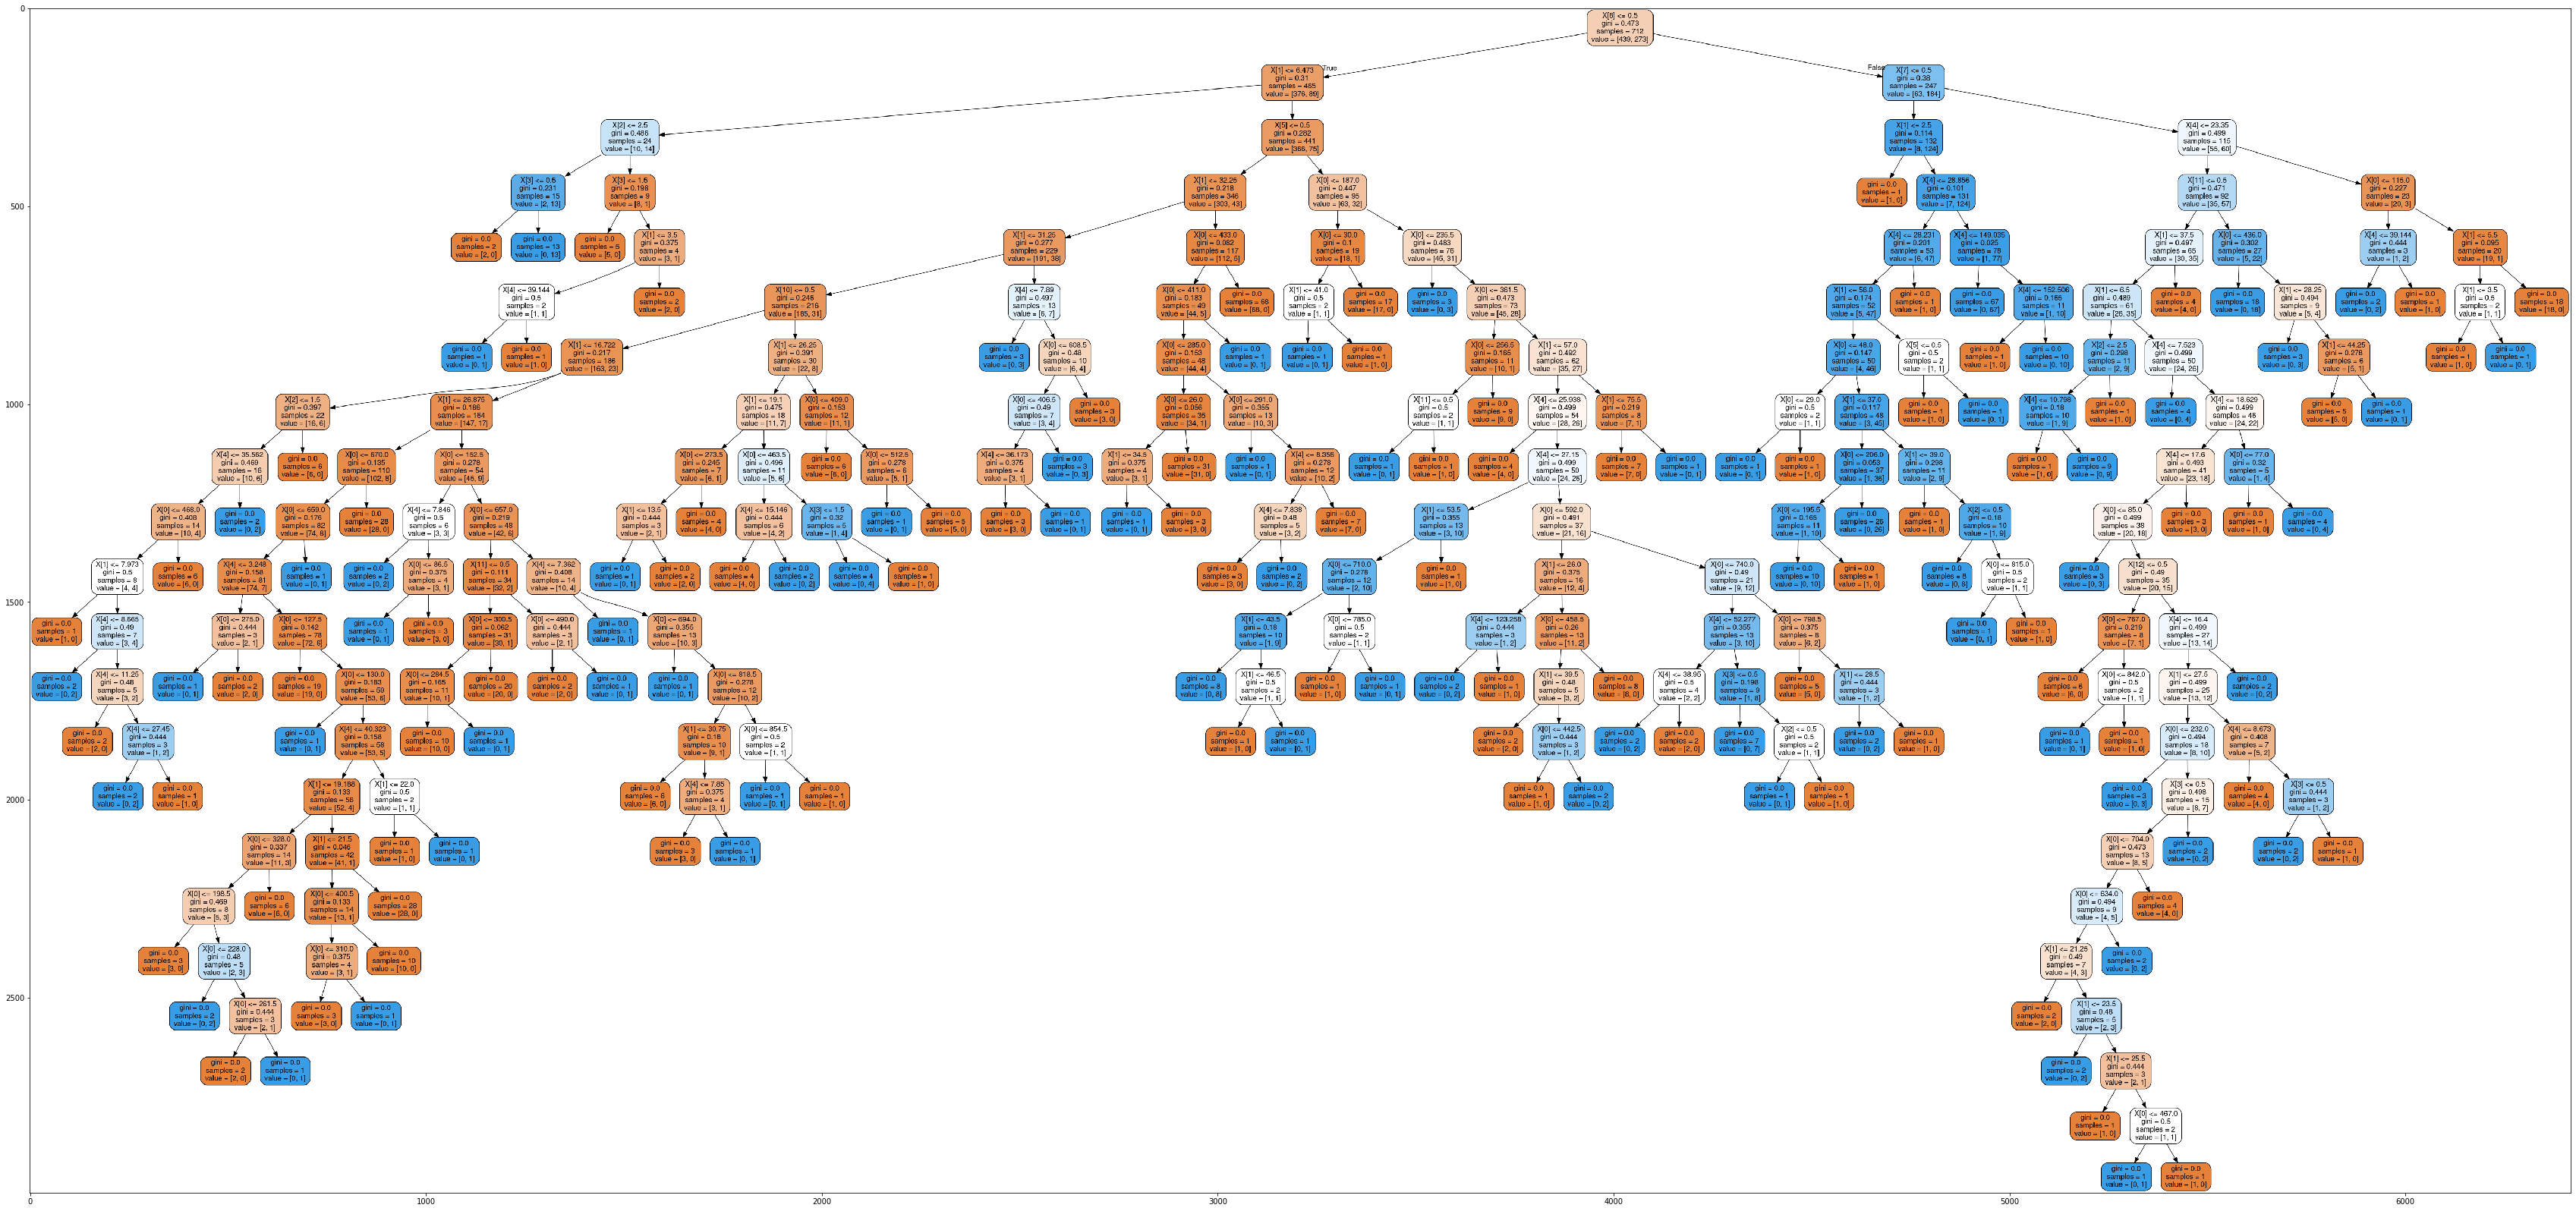

In [14]:
dot_data = io.StringIO()

export_graphviz(decision_tree, out_file=dot_data, rounded=True, filled=True)

filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(60, 60))
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

plt.show()

Tendo a árvore, resta somente alinhar os elementos do conjunto de dados original com os índices de importância correspondentes a cada aspecto do passageiro, para descobrir quais características aumentam mais as chances de sobrevivência destes.

In [15]:
df = df.drop(['Survived'], axis=1)

In [16]:
imp = pd.DataFrame.from_dict(dict(zip(df.columns, decision_tree.feature_importances_)), orient='index')
imp.columns = ['Relevância']
imp = imp.sort_values('Relevância', ascending=False)
imp.head(16)

,Relevância
female,0.293645
PassengerId,0.225293
Age,0.159498
Fare,0.154491
3,0.063689
SibSp,0.032444
Parch,0.026046
1,0.022978
Q,0.013099
S,0.005678


# Resposta

A tabela acima responde a pergunta proposta por este documento, quanto maior o número de relevância de uma característica, maior é a probabilidade de tripulantes apresentando estas sobreviver.

Conforme indicado pela tabela, as cinco características mais relevantes são: Passageiros do sexo feminino; Passageiros específicos, Quantia paga pela viagem, Idade dos passageiros e Passageiros de terceira classe.

# Referências

[1] Boyle, A (2012). 10 Causes of the Titanic Tragedy. https://www.nbcnews.com/science/science-news/10-causes-titanic-tragedy-f620220

[2] Kaggle. Titanic: Machine Learning from Disaster. https://www.kaggle.com/c/titanic/overview

[3] Campos, R (2017). Árvores de Decisão. https://medium.com/machine-learning-beyond-deep-learning/%C3%A1rvores-de-decis%C3%A3o-3f52f6420b69